# Using linear regression on a labeled dataset to predict rainfall in a given region.

In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [11]:
# CLEANING THE DATA

# read data in pandas dataframe
data = pd.read_csv('austin_weather.csv')

# drop (delete) columns with unncesessary data
data = data.drop(['Events', 'Date' , 'SeaLevelPressureHighInches', 'SeaLevelPressureLowInches'], axis = 1)

data = data.replace('T', 0.0)
data = data.replace('-', 0.0)

data.to_csv('austin_final.csv')

In [8]:
data

,Unnamed: 0,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureAvgInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches
0,0,74,60,45,67.0,49.0,43.0,93.0,75.0,57.0,29.68,10.0,7.0,2.0,20.0,4.0,31.0,0.46
1,1,56,48,39,43.0,36.0,28.0,93.0,68.0,43.0,30.13,10.0,10.0,5.0,16.0,6.0,25.0,0.00
2,2,58,45,32,31.0,27.0,23.0,76.0,52.0,27.0,30.49,10.0,10.0,10.0,8.0,3.0,12.0,0.00
3,3,61,46,31,36.0,28.0,21.0,89.0,56.0,22.0,30.45,10.0,10.0,7.0,12.0,4.0,20.0,0.00
4,4,58,50,41,44.0,40.0,36.0,86.0,71.0,56.0,30.33,10.0,10.0,7.0,10.0,2.0,16.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1314,1314,103,89,75,71.0,67.0,61.0,82.0,54.0,25.0,29.97,10.0,10.0,10.0,12.0,5.0,21.0,0.00
1315,1315,105,91,76,71.0,64.0,55.0,87.0,54.0,20.0,29.90,10.0,10.0,10.0,14.0,5.0,20.0,0.00
1316,1316,107,92,77,72.0,64.0,55.0,82.0,51.0,19.0,29.86,10.0,10.0,10.0,12.0,4.0,17.0,0.00
1317,1317,106,93,79,70.0,68.0,63.0,69.0,48.0,27.0,29.91,10.0,10.0,10.0,13.0,4.0,20.0,0.00


In [2]:
data = pd.read_csv('austin_final.csv')

X = data.drop(['PrecipitationSumInches'],axis=1)

Y = data['PrecipitationSumInches']
Y = Y.values.reshape(-1, 1)

day_index = 789
days = [i for i in range (Y.size)]

classifier = LinearRegression()
classifier.fit(X,Y)

inp = np.array([[74], [60], [45], [67], [49], [43], [33], [45], [57], [29.68], [10], [7], [2], [0], [20], [4], [31]])

inp = inp.reshape(1, -1)

# Print the output
print('The precipitation in inches for the input is: ', classifier.predict(inp))

Y_pred = classifier.predict(X)

The precipitation in inches for the input is:  [[1.33868402]]


c:\Users\saini\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


The precipitation trend graph: 


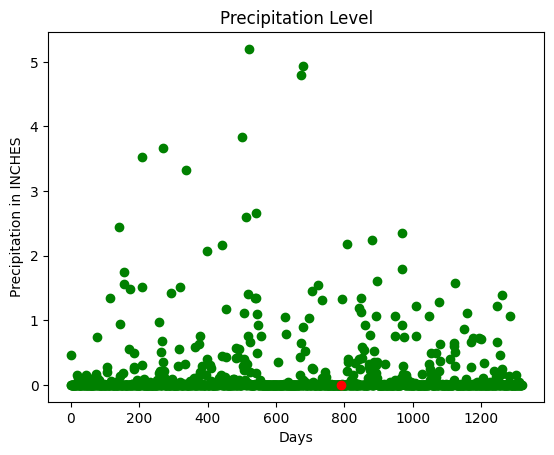

In [3]:
# Plotting a graph of precipitation levels vs no. of days

print('The precipitation trend graph: ')
plt.title('Precipitation Level')
plt.scatter(days, Y, color='green')
plt.scatter(days[day_index], Y[day_index], color='red')
plt.xlabel('Days')
plt.ylabel('Precipitation in INCHES')

plt.show()

Precipitation VS Selected Attributed Graph: 


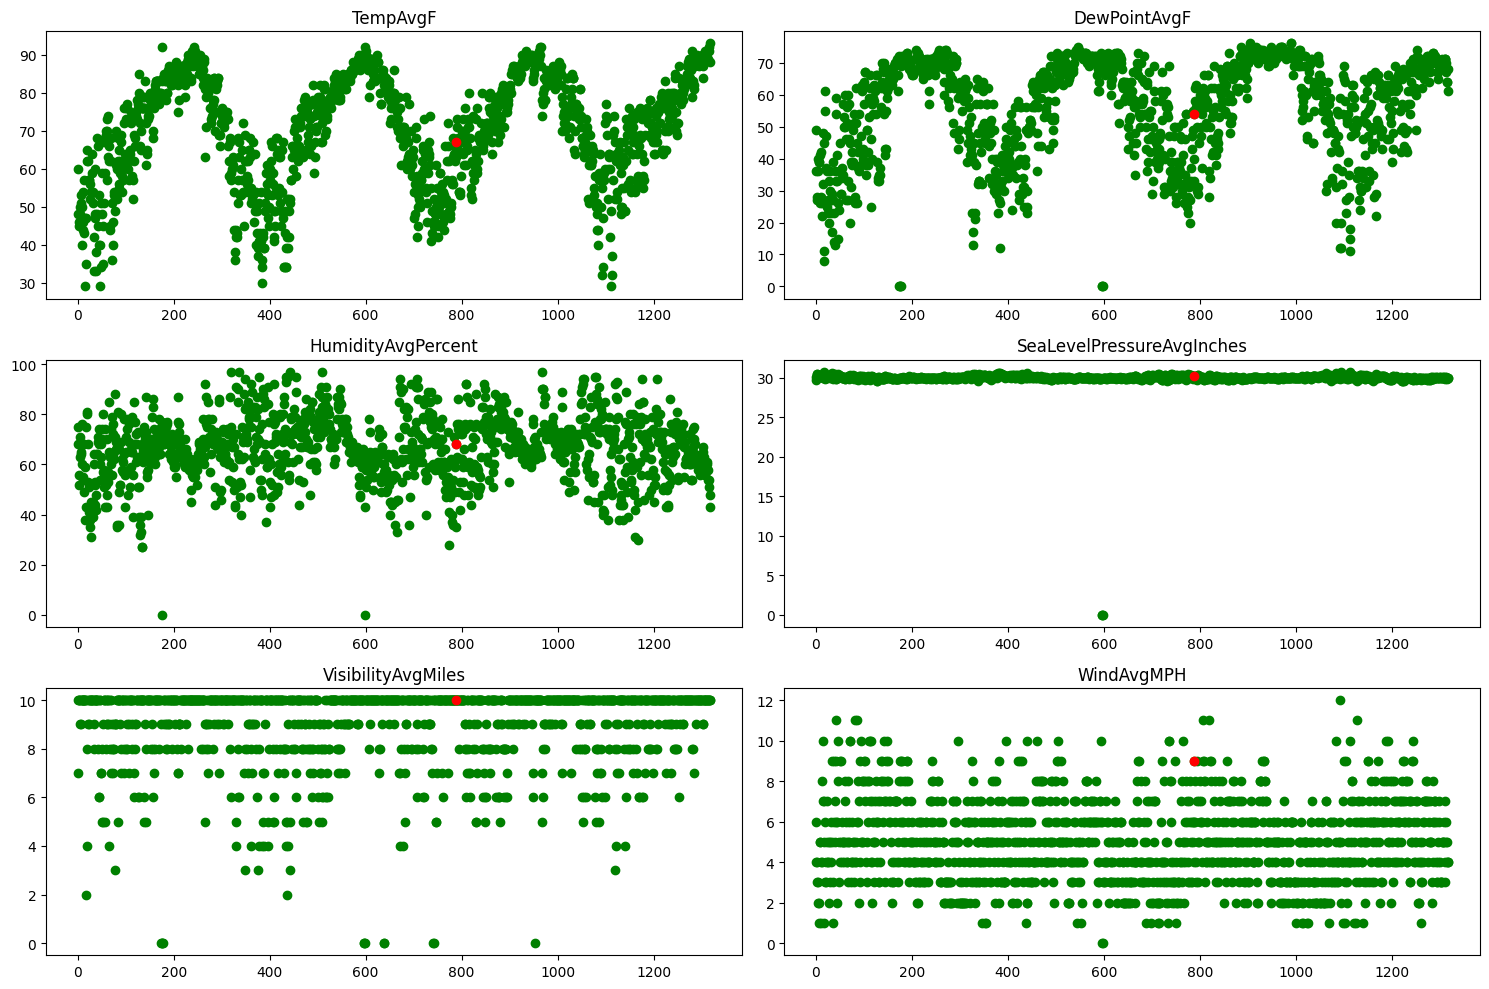

In [4]:
# creating a filter
X_f = X.filter(['TempAvgF', 'DewPointAvgF', 'HumidityAvgPercent', 'SeaLevelPressureAvgInches', 'VisibilityAvgMiles', 'WindAvgMPH'], axis=1)


# Plotting graphs with features VS precipitation to observe the trends
print('Precipitation VS Selected Attributed Graph: ')
plt.figure(figsize=(15,10))
for i in range(X_f.columns.size):
    plt.subplot(3, 2, i+1)
    plt.scatter(days, X_f[X_f.columns.values[i][:100]], color='green')
    plt.scatter(days[day_index], X_f[X_f.columns.values[i]][day_index], color='red')
    plt.title(X_f.columns[i])

plt.tight_layout()
plt.show()


In [5]:
# Calculate Mean Squared Error
mse = mean_squared_error(Y, Y_pred)

# Calculate R-squared
r2 = r2_score(Y, Y_pred)

print('Mean Squared Error:', mse)
print('R-squared:' , r2)

Mean Squared Error: 0.12741690161735222
R-squared: 0.30447244679233
